In [78]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from time import time

In [2]:
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

## The Number of People who have left VS. who have stayed

The Number of Employees Left = 3571 
 Total number of Employees = 14999


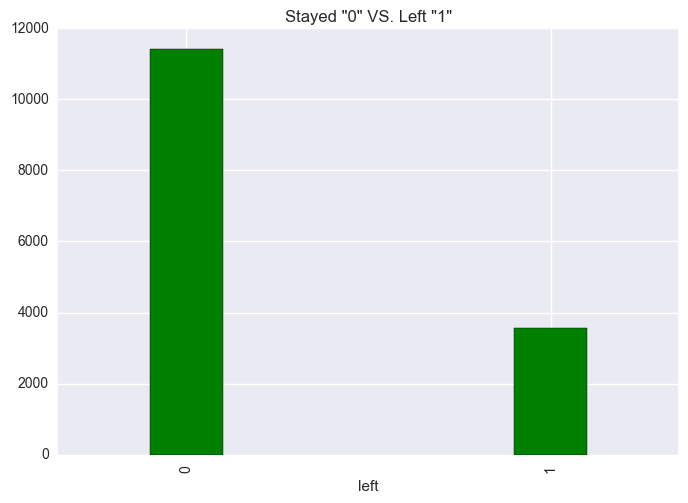

In [45]:
df.groupby('left').count()['salary'].plot(kind='bar', color='g', title='Stayed "0" VS. Left "1"', width =.2,stacked = True)
print('The Number of Employees Left = {} \n Total number of Employees = {}'.format(df[df['left']==1].shape[0], df.shape[0]))

## Show The Percentile of each Salary Class

NameError: name 'high' is not defined

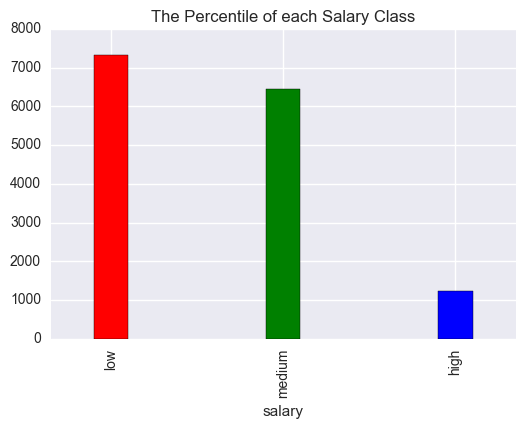

In [82]:
order = ['low', 'medium', 'high']
df.groupby('salary').count()['sales'].ix[order].plot(kind='bar', color='rgb', title='The Percentile of each Salary Class', width =.2,stacked = True)
print('The Number of Employees with low salary = {} \n The Number of Employees with medium salary = {} \n The Number of Employees with high salary'.format(df[df['salary']=='low'].shape[0], df[df['salary']=='medium'].shape[0], df[df['salary']==high].shape[0]))

In [59]:
df_low = df[df['salary'] == 'low']
df_medium = df[df['salary'] == 'medium']
df_high = df[df['salary'] == 'high']
fmt= '{:<22}{:<25}{}'

print(fmt.format('','mean','std'))

for i,(mean,std) in enumerate(zip(df_low.mean() , df_low.std() )):
    print(fmt.format(df_low.columns[i], mean, std))
print('\n')
for i,(mean,std) in enumerate(zip(df_medium.mean() , df_medium.std() )):
    print(fmt.format(df_medium.columns[i], mean, std))
print('\n')
for i,(mean,std) in enumerate(zip(df_high.mean() , df_high.std() )):
    print(fmt.format(df_high.columns[i], mean, std))

                      mean                     std
satisfaction_level    0.6007531437944199       0.254593761941733
last_evaluation       0.717017495899394        0.17326060551822497
number_project        3.799890650628759        1.281822006837944
average_montly_hours  200.9965828321487        50.832214201477065
time_spend_company    3.4382176052487696       1.3038181669165836
Work_accident         0.14215418261344998      0.3492320742806306
left                  0.2968835429196282       0.45691601116040653
promotion_last_5years 0.009021323127392018     0.09455771250585635


satisfaction_level    0.6218166304685063       0.24506911590044703
last_evaluation       0.7173223704622999       0.17104288525984024
number_project        3.8135277691591685       1.2012316138017844
average_montly_hours  201.33834936394663       49.34418794966946
time_spend_company    3.52901023890785         1.5064420799217257
Work_accident         0.14536146447409246      0.35249224780337285
left                

# Find Correlation Matrix between all features

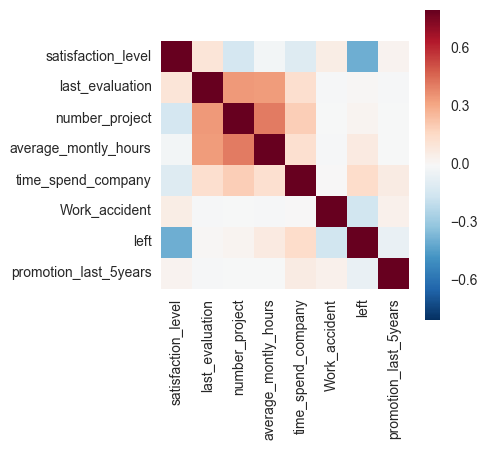

In [58]:
corrmat = df.corr()
f, ax =plt.subplots(figsize=(4,4))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=0.8, square = True)
plt.show()

# As a Result:
    • the avg monthy hours and # of projects are highly corrleated, in the other hand, they both have high correation with unsatisfaction levels of the employees.
    • the period of time that the employees spend in the company is a very important factor which reflect on unsatisfactin employee level .

# Satisfaction Level by Sales

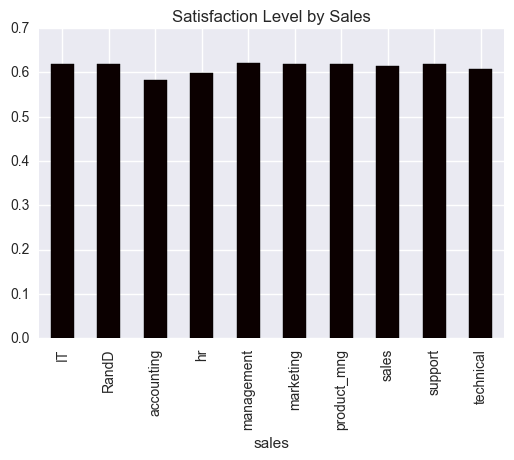

In [83]:
df.groupby('sales').mean()['satisfaction_level'].plot(kind='bar', title = 'Satisfaction Level by Sales', colormap='hot')

# Left Level by Slaes

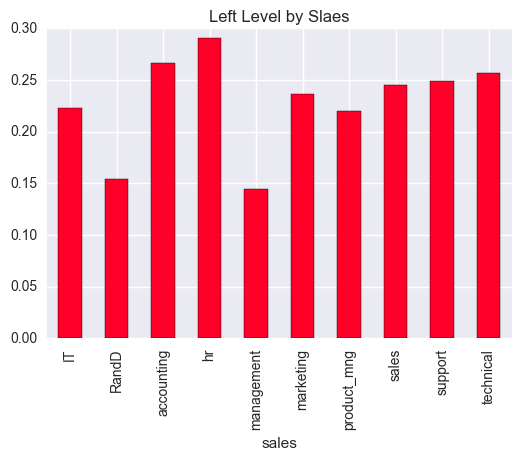

In [84]:
df.groupby('sales').mean()['left'].plot(kind='bar', title = 'Left Level by Slaes', colormap='gist_rainbow')

# As a Result:
    • Although, Accountants have the highest level of unstasifaction but HR have the highest level of departure

# Sales by Salary all feature plot

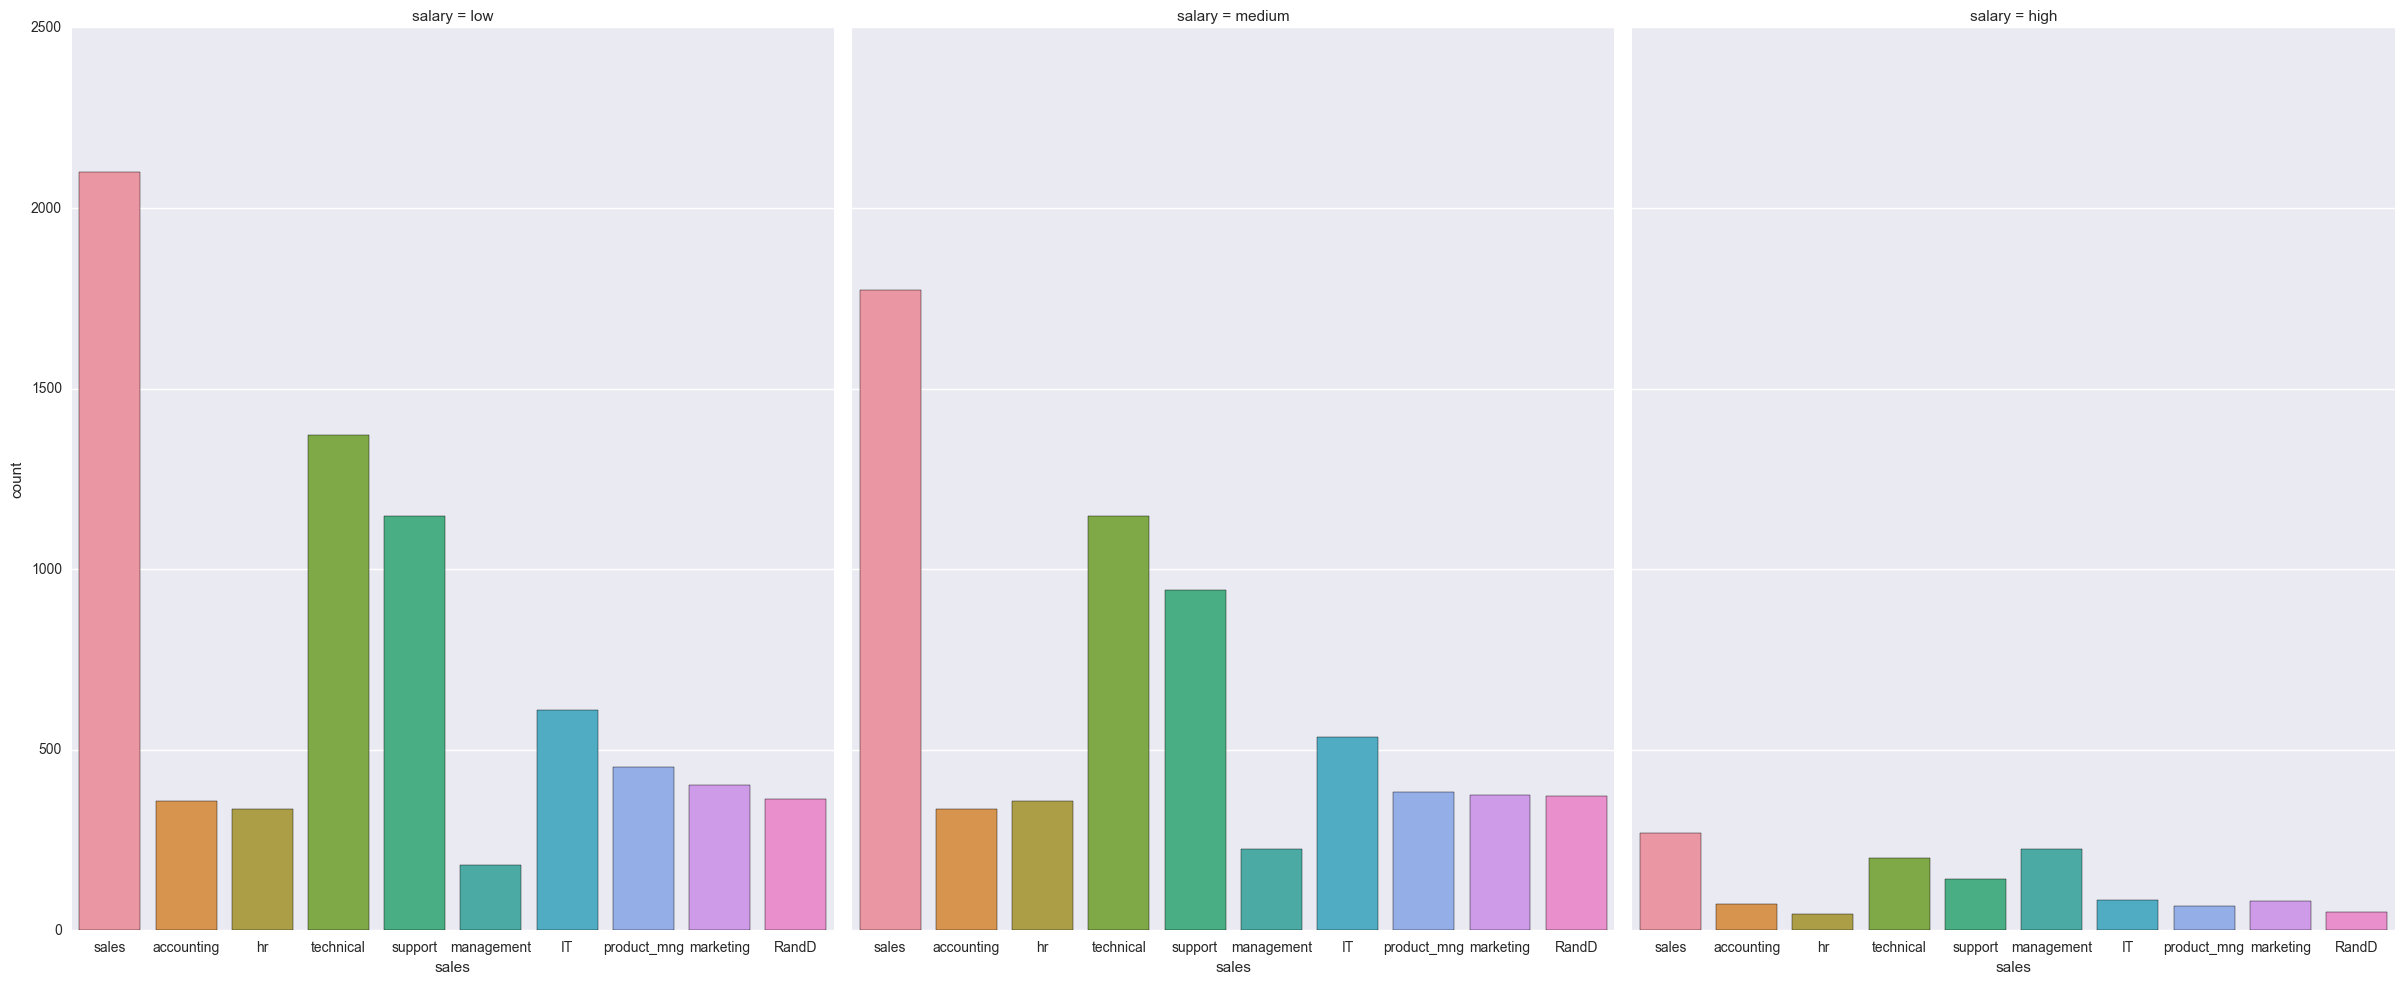

In [67]:
sns.factorplot("sales", col="salary", col_wrap=3, data=df, kind="count", size=10, aspect=.8)

In [81]:
# Predict who will left from other features

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split

In [69]:
df_copy = pd.get_dummies(df)
df_copy.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.11,0.88,7,272,4,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.72,0.87,5,223,5,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [74]:
df1 = df_copy
y = df1['left'].values
df1 = df1.drop(['left'],axis=1)
X = df1.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

In [76]:
log_reg = LogisticRegression()
log_reg.fit(Xtrain, ytrain)
pred_log = log_reg.predict(Xtest)
accuracy = accuracy_score(pred_log, ytest)
print("Validation accuracy: ", accuracy)

Validation accuracy:  0.7784


In [80]:
clf= svm.SVC(C=10000,kernel="rbf")
t0=time()
clf.fit(Xtrain,ytrain)
print("RBF Kernel, C=10000\ntraining time: ", round(time()-t0, 3), "s")

t1=time()
pred=clf.predict(Xtest)
print("predicting time: ", round(time()-t1, 3),"s")
accuracy= accuracy_score(pred, ytest)
print(accuracy)

RBF Kernel, C=10000
training time:  22.006 s
predicting time:  0.898 s
0.9576
